![](etc/callbacks.png)

### tf.kerasm.callbacks.ModelCheckpoint

### tf.keras.callbacks.TensorBoard
텐서보드 링크들  
https://www.tensorflow.org/tensorboard/get_started?hl=ko  
    https://www.tensorflow.org/guide/migrate/tensorboard  

In [1]:
# #1.OS환경만들기  
# import os  # 탐색기 모듈. os.path
# os.environ['KERAS_BACKEND']  ='tensorflow'
# kerasBKED  = os.environ['KERAS_BACKEND']
# print(kerasBKED)

In [2]:
""" ▶ Step 1. ModelCheckpoint 준비 """
 # 21 콜백 - 모델체크포인트 부분 여기에 붙여 넣음.

' ▶ Step 1. ModelCheckpoint 준비 '

In [3]:
""" ▶ Step 1. 데이터 만들기 """

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, InputLayer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger, TensorBoard

x = np.linspace(0, 10, num = 50)
y = 2* x + 3 

print(x)
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle = False)


[ 0.          0.20408163  0.40816327  0.6122449   0.81632653  1.02040816
  1.2244898   1.42857143  1.63265306  1.83673469  2.04081633  2.24489796
  2.44897959  2.65306122  2.85714286  3.06122449  3.26530612  3.46938776
  3.67346939  3.87755102  4.08163265  4.28571429  4.48979592  4.69387755
  4.89795918  5.10204082  5.30612245  5.51020408  5.71428571  5.91836735
  6.12244898  6.32653061  6.53061224  6.73469388  6.93877551  7.14285714
  7.34693878  7.55102041  7.75510204  7.95918367  8.16326531  8.36734694
  8.57142857  8.7755102   8.97959184  9.18367347  9.3877551   9.59183673
  9.79591837 10.        ]
[ 3.          3.40816327  3.81632653  4.2244898   4.63265306  5.04081633
  5.44897959  5.85714286  6.26530612  6.67346939  7.08163265  7.48979592
  7.89795918  8.30612245  8.71428571  9.12244898  9.53061224  9.93877551
 10.34693878 10.75510204 11.16326531 11.57142857 11.97959184 12.3877551
 12.79591837 13.20408163 13.6122449  14.02040816 14.42857143 14.83673469
 15.24489796 15.65306122 

In [4]:
""" ▶ Step 2. 모델 만들고 컴파일 후 학습 """

import os
import datetime
model = Sequential([
    Dense(1, input_shape=(1,), activation = 'linear')
])

early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 5, verbose = 1, mode = 'auto', start_from_epoch=10)

csv_logger = CSVLogger('./logs/training.csv')

saveDir = './logs/'
file_path= os.path.join(saveDir,'ModelCheckpoint.Test.{epoch:02d}-{loss:.2f}-{val_loss:.2f}.hdf5' )
model_check_point = ModelCheckpoint(filepath = file_path , monitor ='val_loss', verbose=1, save_best_only = True, mode = 'auto' )

log_dir = os.path.join('logs', 'fit', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(log_dir = log_dir, histogram_freq = 1)

model.compile(optimizer = 'sgd', loss = 'mse')

model.fit(x_train, y_train, epochs = 500, callbacks = [early_stopping, csv_logger, tensorboard_callback, model_check_point],
          validation_data = (x_test, y_test))

print(model.get_weights())



Epoch 1/500

1/2 [==============>...............] - ETA: 0s - loss: 198.0302
Epoch 1: val_loss improved from inf to 92.24239, saving model to ./logs\ModelCheckpoint.Test.01-180.17-92.24.hdf5
2/2 [==============================] - 1s 296ms/step - loss: 180.1722 - val_loss: 92.2424
Epoch 2/500
1/2 [==============>...............] - ETA: 0s - loss: 34.0541
Epoch 2: val_loss improved from 92.24239 to 7.99055, saving model to ./logs\ModelCheckpoint.Test.02-31.16-7.99.hdf5
2/2 [==============================] - 0s 63ms/step - loss: 31.1585 - val_loss: 7.9905
Epoch 3/500
1/2 [==============>...............] - ETA: 0s - loss: 6.6776
Epoch 3: val_loss improved from 7.99055 to 0.11028, saving model to ./logs\ModelCheckpoint.Test.03-6.19-0.11.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 6.1852 - val_loss: 0.1103
Epoch 4/500
1/2 [==============>...............] - ETA: 0s - loss: 1.9542
Epoch 4: val_loss did not improve from 0.11028


C:\Users\ALT\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 49ms/step - loss: 1.9121 - val_loss: 1.8223
Epoch 5/500
1/2 [==============>...............] - ETA: 0s - loss: 1.3721
Epoch 5: val_loss did not improve from 0.11028
2/2 [==============================] - 0s 52ms/step - loss: 1.3937 - val_loss: 2.5797
Epoch 6/500
1/2 [==============>...............] - ETA: 0s - loss: 1.3186
Epoch 6: val_loss did not improve from 0.11028
2/2 [==============================] - 0s 52ms/step - loss: 1.3210 - val_loss: 4.1228
Epoch 7/500
1/2 [==============>...............] - ETA: 0s - loss: 1.3659
Epoch 7: val_loss did not improve from 0.11028
2/2 [==============================] - 0s 54ms/step - loss: 1.2978 - val_loss: 2.5607
Epoch 8/500
1/2 [==============>...............] - ETA: 0s - loss: 1.2653
Epoch 8: val_loss did not improve from 0.11028
2/2 [==============================] - 0s 52ms/step - loss: 1.2764 - val_loss: 2.1195
Epoch 9/500
1/2 [==============>...............] - ETA: 0s - loss: 1.2352
Epoch 9: val

1/1 [==============================] - 0s 21ms/step


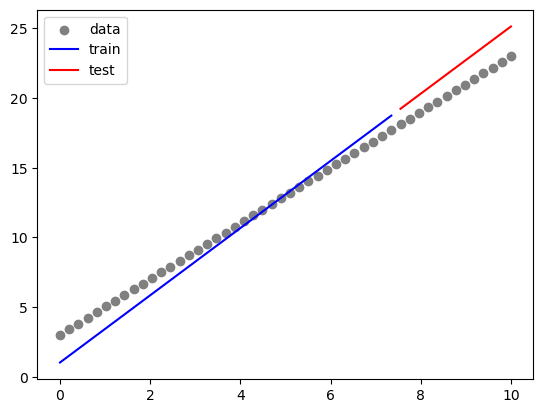

In [5]:
plt.scatter(x,y, label='data',color ='gray')
plt.plot (x_train , model.predict(x_train), label ='train', color ='blue')
plt.plot(x_test, model.predict(x_test), label ='test' ,color ='red')
plt.legend() 

In [10]:
%load_ext tensorboard
#%reload_ext tensorboard
#%tensorboard --logdir {classifier.model_dir}
%tensorboard --logdir logs/fit  --host localhost

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [7]:
# 가중치 형태와 통계 확인하기
for layer in model.layers:
    weights = layer.get_weights() # 가중치 + 편향 리스트로 리턴
    if weights:                   # 가중치 shape, max값, min값 뽑아봤음.
        print(f"{layer.name :<12} shape: {weights[0].shape}\t min: {weights[0].min()}\t max: {weights[0].max()}")
        
        # 편향이 있다면 추가 정보를 확인할 수 있다. 길이가 1 보다 크다는 것은 편향이 있다는 것.
        if len(weights) > 1:
            print(f"  > {layer.name :<12} biases shape: {weights[1].shape}\t biases mean: {weights[1].mean()}")
            

dense        shape: (1, 1)	 min: 2.4112203121185303	 max: 2.4112203121185303
  > dense        biases shape: (1,)	 biases mean: 1.0210235118865967


In [8]:
#!kill 6264